# Exploratory Data Analysis - read dataframes

In [56]:
# imports

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

%matplotlib inline

In [37]:
# read the CSV files

df = pd.read_csv('cases_with_mask_use.csv')


## mask.csv basic inspection

In [16]:
# check the size of dataframes  
df.shape

(17486, 12)

In [17]:
# check the top 10 lines 
df.head(10)

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
0,Santa Clara,151.0,6.0,151,6,2020-03-18,0.015,0.014,0.04,0.168,0.764,1927852
1,Santa Clara,183.0,8.0,32,2,2020-03-19,0.015,0.014,0.04,0.168,0.764,1927852
2,Santa Clara,246.0,8.0,63,0,2020-03-20,0.015,0.014,0.04,0.168,0.764,1927852
3,Santa Clara,269.0,10.0,23,2,2020-03-21,0.015,0.014,0.04,0.168,0.764,1927852
4,Santa Clara,284.0,13.0,15,3,2020-03-22,0.015,0.014,0.04,0.168,0.764,1927852
5,Santa Clara,336.0,13.0,52,0,2020-03-23,0.015,0.014,0.04,0.168,0.764,1927852
6,Santa Clara,389.0,17.0,53,4,2020-03-24,0.015,0.014,0.04,0.168,0.764,1927852
7,Santa Clara,452.0,20.0,63,3,2020-03-25,0.015,0.014,0.04,0.168,0.764,1927852
8,Santa Clara,487.0,20.0,35,0,2020-03-26,0.015,0.014,0.04,0.168,0.764,1927852
9,Santa Clara,557.0,25.0,70,5,2020-03-27,0.015,0.014,0.04,0.168,0.764,1927852


In [18]:
# check how many null values are in each

df.isnull().sum()


county                 0
totalcountconfirmed    0
totalcountdeaths       0
newcountconfirmed      0
newcountdeaths         0
date                   0
NEVER                  0
RARELY                 0
SOMETIMES              0
FREQUENTLY             0
ALWAYS                 0
population             0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17486 entries, 0 to 17485
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   county               17486 non-null  object 
 1   totalcountconfirmed  17486 non-null  float64
 2   totalcountdeaths     17486 non-null  float64
 3   newcountconfirmed    17486 non-null  int64  
 4   newcountdeaths       17486 non-null  int64  
 5   date                 17486 non-null  object 
 6   NEVER                17486 non-null  float64
 7   RARELY               17486 non-null  float64
 8   SOMETIMES            17486 non-null  float64
 9   FREQUENTLY           17486 non-null  float64
 10  ALWAYS               17486 non-null  float64
 11  population           17486 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 1.6+ MB


In [20]:
df.nunique()

county                   58
totalcountconfirmed    7956
totalcountdeaths       1269
newcountconfirmed      1313
newcountdeaths          108
date                    302
NEVER                    37
RARELY                   38
SOMETIMES                46
FREQUENTLY               45
ALWAYS                   54
population               58
dtype: int64

In [21]:
df.describe()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
count,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,1.748600e+04
mean,11864.667048,196.650292,161.083438,1.810248,0.032278,0.030698,0.063649,0.158543,0.714797,6.824013e+05
std,45130.684475,784.510735,777.737090,9.369938,0.028532,0.026178,0.033899,0.040410,0.092762,1.456244e+06
min,0.000000,0.000000,-578.000000,-16.000000,0.001000,0.000000,0.004000,0.058000,0.482000,1.129000e+03
25%,83.000000,1.000000,1.000000,0.000000,0.015000,0.013000,0.040000,0.134000,0.661000,4.590500e+04
50%,930.000000,13.000000,13.000000,0.000000,0.023000,0.023000,0.058000,0.156000,0.737000,1.928430e+05
75%,7530.000000,105.000000,81.000000,0.000000,0.043000,0.043000,0.084000,0.186000,0.786000,7.621480e+05
max,937985.000000,12955.000000,28549.000000,318.000000,0.140000,0.135000,0.162000,0.276000,0.889000,1.003911e+07


In [22]:
df.columns

Index(['county', 'totalcountconfirmed', 'totalcountdeaths',
       'newcountconfirmed', 'newcountdeaths', 'date', 'NEVER', 'RARELY',
       'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'population'],
      dtype='object')

In [38]:
df['date'] = pd.to_datetime(df['date'])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17486 entries, 0 to 17485
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   county               17486 non-null  object        
 1   totalcountconfirmed  17486 non-null  float64       
 2   totalcountdeaths     17486 non-null  float64       
 3   newcountconfirmed    17486 non-null  int64         
 4   newcountdeaths       17486 non-null  int64         
 5   date                 17486 non-null  datetime64[ns]
 6   NEVER                17486 non-null  float64       
 7   RARELY               17486 non-null  float64       
 8   SOMETIMES            17486 non-null  float64       
 9   FREQUENTLY           17486 non-null  float64       
 10  ALWAYS               17486 non-null  float64       
 11  population           17486 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 1.6+ MB


In [25]:
max(df['date'])

Timestamp('2021-01-13 00:00:00')

In [39]:
df['confirmedper100k'] = df['totalcountconfirmed']/df['population']*100000
df['newlyconfirmedper100k'] = df['newcountconfirmed']/df['population']*100000
df['deathper100k'] = df['totalcountdeaths']/df['population']*100000
df['newdeath100k'] = df['newcountdeaths']/df['population']*100000


df.head()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k
0,Santa Clara,151.0,6.0,151,6,2020-03-18,0.015,0.014,0.04,0.168,0.764,1927852,7.832551,7.832551,0.311227,0.311227
1,Santa Clara,183.0,8.0,32,2,2020-03-19,0.015,0.014,0.04,0.168,0.764,1927852,9.492430,1.659878,0.414970,0.103742
2,Santa Clara,246.0,8.0,63,0,2020-03-20,0.015,0.014,0.04,0.168,0.764,1927852,12.760316,3.267886,0.414970,0.000000
3,Santa Clara,269.0,10.0,23,2,2020-03-21,0.015,0.014,0.04,0.168,0.764,1927852,13.953353,1.193038,0.518712,0.103742
4,Santa Clara,284.0,13.0,15,3,2020-03-22,0.015,0.014,0.04,0.168,0.764,1927852,14.731421,0.778068,0.674326,0.155614


In [40]:
df['7dayrollingavg_newlyconfirmed']=df.groupby('county',sort=False).rolling(window=7).newlyconfirmedper100k.mean().reset_index(drop='county')
df['7dayrollingavg_newdeath']=df.groupby('county',sort=False).rolling(window=7).newdeath100k.mean().reset_index(drop='county')
df.head(10)

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath
0,Santa Clara,151.0,6.0,151,6,2020-03-18,0.015,0.014,0.04,0.168,0.764,1927852,7.832551,7.832551,0.311227,0.311227,NaN,NaN
1,Santa Clara,183.0,8.0,32,2,2020-03-19,0.015,0.014,0.04,0.168,0.764,1927852,9.492430,1.659878,0.414970,0.103742,NaN,NaN
2,Santa Clara,246.0,8.0,63,0,2020-03-20,0.015,0.014,0.04,0.168,0.764,1927852,12.760316,3.267886,0.414970,0.000000,NaN,NaN
3,Santa Clara,269.0,10.0,23,2,2020-03-21,0.015,0.014,0.04,0.168,0.764,1927852,13.953353,1.193038,0.518712,0.103742,NaN,NaN
4,Santa Clara,284.0,13.0,15,3,2020-03-22,0.015,0.014,0.04,0.168,0.764,1927852,14.731421,0.778068,0.674326,0.155614,NaN,NaN
5,Santa Clara,336.0,13.0,52,0,2020-03-23,0.015,0.014,0.04,0.168,0.764,1927852,17.428724,2.697302,0.674326,0.000000,NaN,NaN
6,Santa Clara,389.0,17.0,53,4,2020-03-24,0.015,0.014,0.04,0.168,0.764,1927852,20.177897,2.749174,0.881810,0.207485,0.820562,0.017095
7,Santa Clara,452.0,20.0,63,3,2020-03-25,0.015,0.014,0.04,0.168,0.764,1927852,23.445783,3.267886,1.037424,0.155614,0.897489,0.025643
8,Santa Clara,487.0,20.0,35,0,2020-03-26,0.015,0.014,0.04,0.168,0.764,1927852,25.261275,1.815492,1.037424,0.000000,1.162462,0.034190
9,Santa Clara,557.0,25.0,70,5,2020-03-27,0.015,0.014,0.04,0.168,0.764,1927852,28.892259,3.630984,1.296780,0.259356,1.222295,0.034190


In [43]:
df_topconfirmed = df.sort_values(by=['7dayrollingavg_newlyconfirmed'], ascending=False)
df_topconfirmed

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath
5393,Santa Cruz,6361.0,60.0,312,5,2020-12-15,0.008,0.000,0.086,0.109,0.797,273213,2328.220107,114.196616,21.960888,1.830074,566.793296,4.672657e-01
5394,Santa Cruz,6536.0,64.0,175,4,2020-12-16,0.008,0.000,0.086,0.109,0.797,273213,2392.272696,64.052589,23.424947,1.464059,497.637972,9.345314e-01
5399,Santa Cruz,7315.0,73.0,137,3,2020-12-21,0.008,0.000,0.086,0.109,0.797,273213,2677.398220,50.144027,26.719080,1.098044,417.268271,9.345314e-01
5398,Santa Cruz,7178.0,70.0,124,0,2020-12-20,0.008,0.000,0.086,0.109,0.797,273213,2627.254194,45.385834,25.621036,0.000000,374.747092,4.672657e-01
538,San Mateo,11857.0,162.0,74,0,2020-11-09,0.016,0.013,0.058,0.126,0.786,766573,1546.754190,9.653353,21.133017,0.000000,366.949260,7.930164e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17185,Yolo,5.0,0.0,1,0,2020-03-19,0.007,0.005,0.040,0.156,0.791,220500,2.267574,0.453515,0.000000,0.000000,NaN,NaN
17186,Yolo,5.0,0.0,0,0,2020-03-20,0.007,0.005,0.040,0.156,0.791,220500,2.267574,0.000000,0.000000,0.000000,NaN,NaN
17187,Yolo,6.0,0.0,1,0,2020-03-21,0.007,0.005,0.040,0.156,0.791,220500,2.721088,0.453515,0.000000,0.000000,NaN,NaN
17188,Yolo,6.0,0.0,0,0,2020-03-22,0.007,0.005,0.040,0.156,0.791,220500,2.721088,0.000000,0.000000,0.000000,NaN,NaN


In [44]:
df.corr()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath
totalcountconfirmed,1.000000,0.949822,0.866452,0.749547,-0.084601,-0.127947,-0.088846,-0.125150,0.149037,0.691354,0.342603,0.212407,0.360146,0.102545,0.110224,0.073836
totalcountdeaths,0.949822,1.000000,0.753252,0.697628,-0.085125,-0.131276,-0.092298,-0.128445,0.152876,0.798887,0.261336,0.141618,0.342834,0.082189,0.049257,0.032931
newcountconfirmed,0.866452,0.753252,1.000000,0.742399,-0.065983,-0.099680,-0.074482,-0.098003,0.118276,0.543334,0.294297,0.292713,0.273227,0.106398,0.128259,0.084746
newcountdeaths,0.749547,0.697628,0.742399,1.000000,-0.064787,-0.098021,-0.069152,-0.092419,0.113137,0.588485,0.199046,0.151223,0.223436,0.237232,0.059410,0.046546
NEVER,-0.084601,-0.085125,-0.065983,-0.064787,1.000000,0.322411,0.208287,0.153016,-0.539908,-0.157266,-0.074161,-0.022087,-0.161930,-0.034672,-0.072930,-0.009524
RARELY,-0.127947,-0.131276,-0.099680,-0.098021,0.322411,1.000000,0.426203,0.379223,-0.701203,-0.219864,-0.112030,-0.034277,-0.230415,-0.054535,-0.009074,0.006837
SOMETIMES,-0.088846,-0.092298,-0.074482,-0.069152,0.208287,0.426203,1.000000,0.570585,-0.796940,-0.173346,0.041887,0.046948,-0.115553,-0.008402,-0.032167,-0.065804
FREQUENTLY,-0.125150,-0.128445,-0.098003,-0.092419,0.153016,0.379223,0.570585,1.000000,-0.796274,-0.198758,-0.104299,-0.022560,-0.198655,-0.033531,-0.066932,-0.030130
ALWAYS,0.149037,0.152876,0.118276,0.113137,-0.539908,-0.701203,-0.796940,-0.796274,1.000000,0.260548,0.084494,0.009146,0.243100,0.043645,0.065770,0.037979
population,0.691354,0.798887,0.543334,0.588485,-0.157266,-0.219864,-0.173346,-0.198758,0.260548,1.000000,0.092152,0.048850,0.188796,0.043499,-0.042918,-0.041324


In [46]:
df_santacruz = df[df['county'] == 'Santa Cruz']

In [47]:
df_santacruz

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath
5121,Santa Cruz,11.0,0.0,11,0,2020-03-18,0.008,0.0,0.086,0.109,0.797,273213,4.026163,4.026163,0.000000,0.000000,NaN,NaN
5122,Santa Cruz,13.0,0.0,2,0,2020-03-19,0.008,0.0,0.086,0.109,0.797,273213,4.758192,0.732030,0.000000,0.000000,NaN,NaN
5123,Santa Cruz,13.0,0.0,0,0,2020-03-20,0.008,0.0,0.086,0.109,0.797,273213,4.758192,0.000000,0.000000,0.000000,NaN,NaN
5124,Santa Cruz,17.0,0.0,4,0,2020-03-21,0.008,0.0,0.086,0.109,0.797,273213,6.222252,1.464059,0.000000,0.000000,NaN,NaN
5125,Santa Cruz,19.0,0.0,2,0,2020-03-22,0.008,0.0,0.086,0.109,0.797,273213,6.954281,0.732030,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,Santa Cruz,10717.0,104.0,231,0,2021-01-09,0.008,0.0,0.086,0.109,0.797,273213,3922.580551,84.549417,38.065539,0.000000,72.893449,0.934531
5419,Santa Cruz,10951.0,104.0,234,0,2021-01-10,0.008,0.0,0.086,0.109,0.797,273213,4008.228013,85.647462,38.065539,0.000000,51.866493,0.934531
5420,Santa Cruz,11093.0,106.0,142,2,2021-01-11,0.008,0.0,0.086,0.109,0.797,273213,4060.202113,51.974101,38.797568,0.732030,45.324773,0.934531
5421,Santa Cruz,11267.0,111.0,174,5,2021-01-12,0.008,0.0,0.086,0.109,0.797,273213,4123.888688,63.686574,40.627642,1.830074,49.062899,0.934531


<AxesSubplot:xlabel='date'>

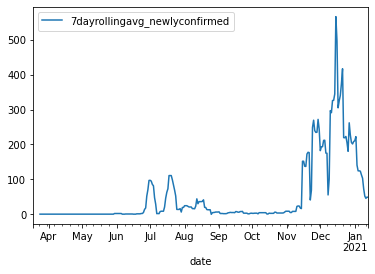

In [48]:
df_santacruz.plot(x='date', y='7dayrollingavg_newlyconfirmed')

AttributeError: 'FacetGrid' object has no attribute 'xaxis'

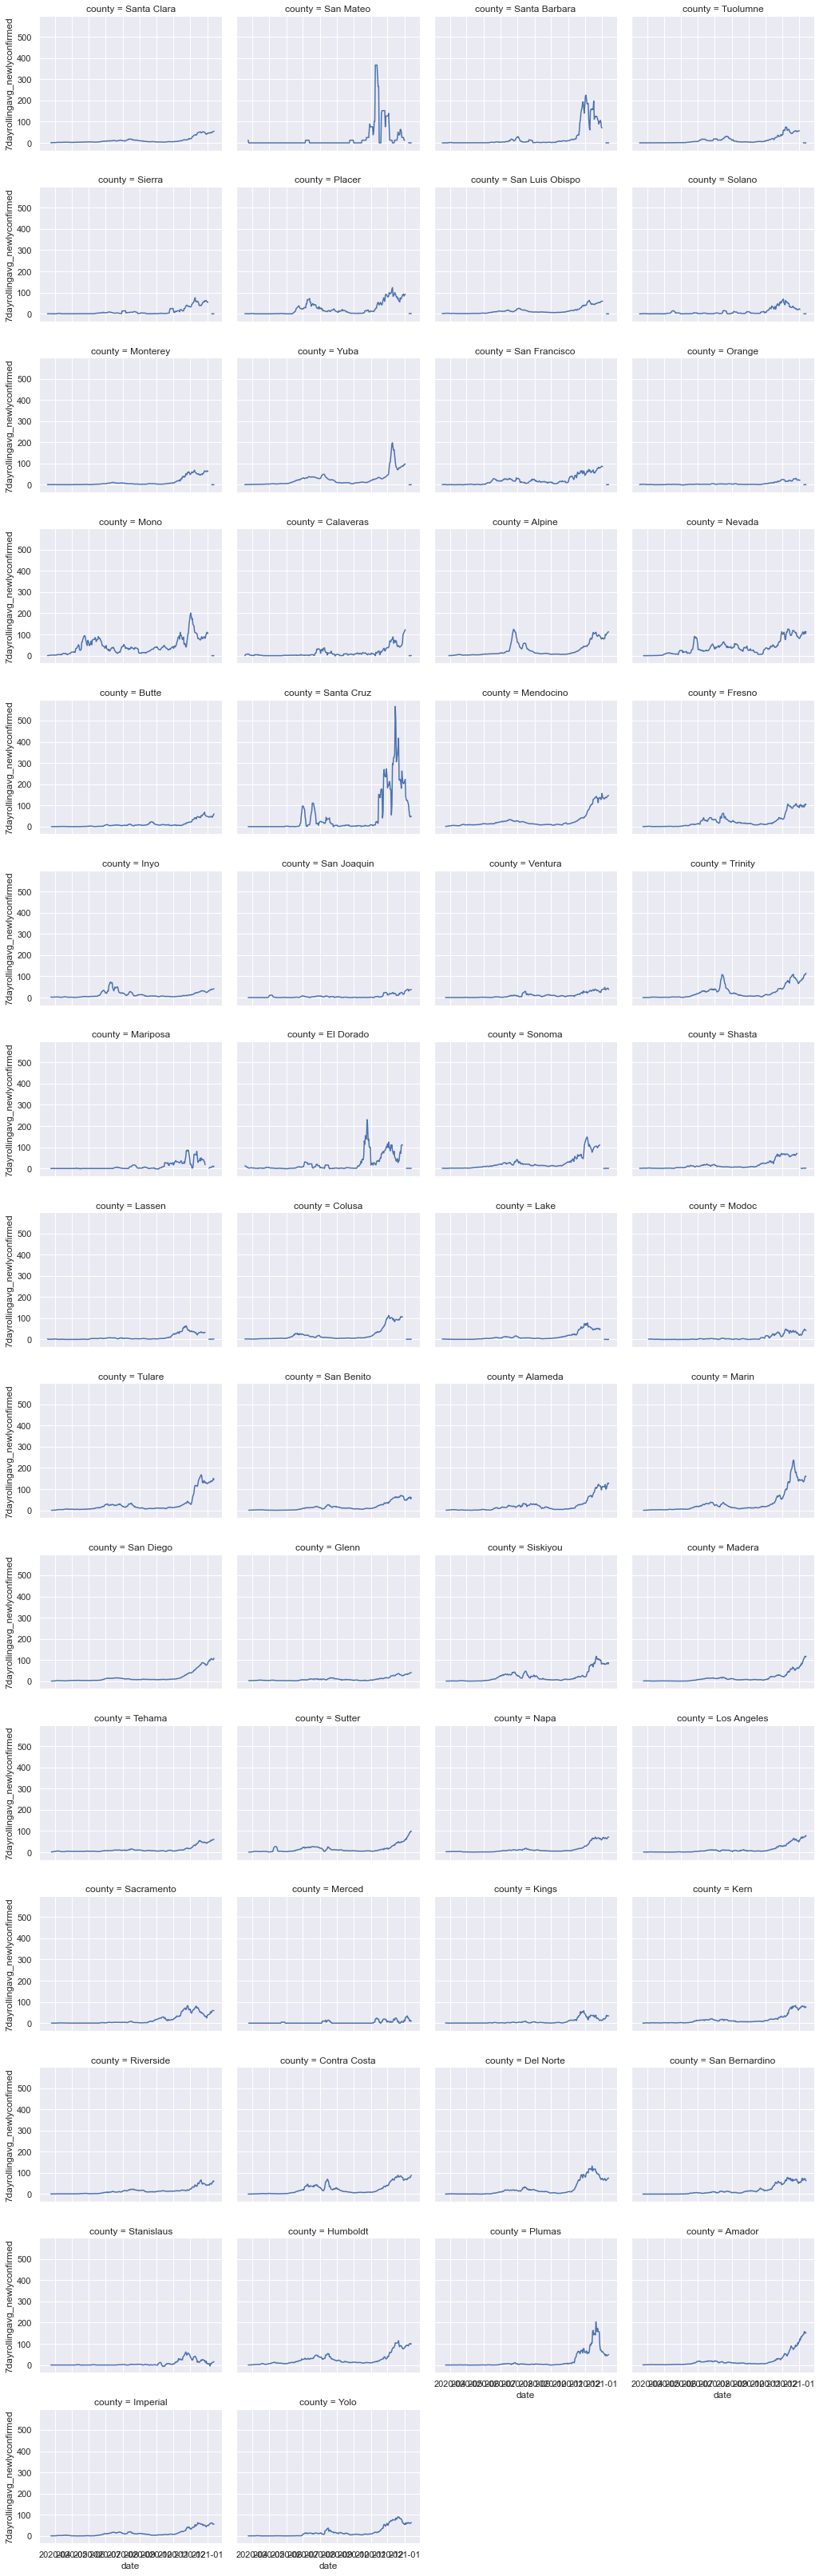

In [58]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="county", col_wrap=4, height=3, aspect=1.2)
g.map(sns.lineplot, "date","7dayrollingavg_newlyconfirmed")
g.add_legend()

plt.show()

(0.0, 100.0)

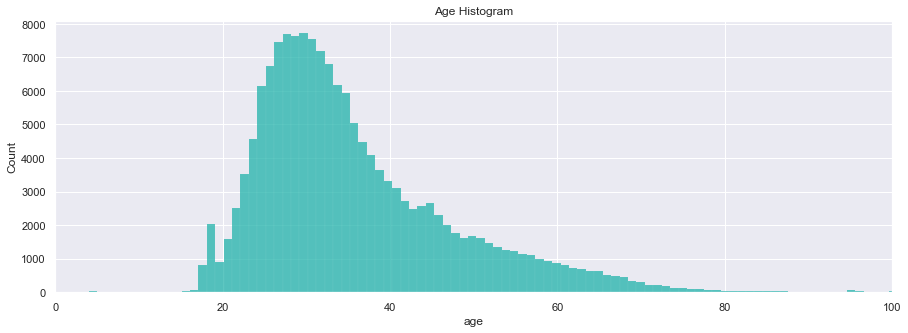

In [72]:

fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['age'], bins=2000, color='lightseagreen');
ax.set(title="Age Histogram")
ax.set_xlim(0,100)


In [108]:
df_country = pd.DataFrame(df['country_destination'].value_counts())
df_country['country'] = df_country.index
df_country.rename(columns={'country_destination':'count'}, inplace=True)

[Text(0.5, 1.0, 'Destination Country Histogram')]

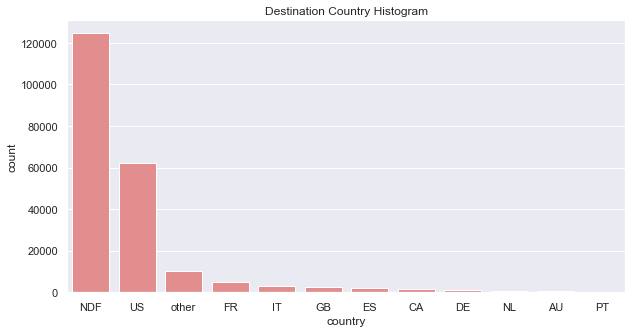

In [121]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_country['country'], y=df_country['count'], color='lightcoral');
ax.set(title="Destination Country Histogram")


[Text(0.5, 1.0, 'Signup Method Histogram')]

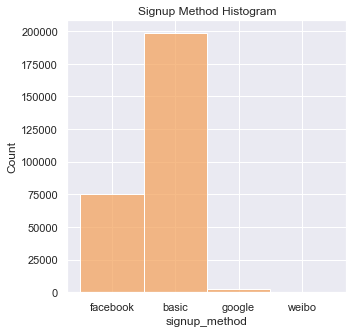

In [120]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df['signup_method'],color='sandybrown');
ax.set(title="Signup Method Histogram")

[Text(0.5, 1.0, 'Affiliate Channel Histogram')]

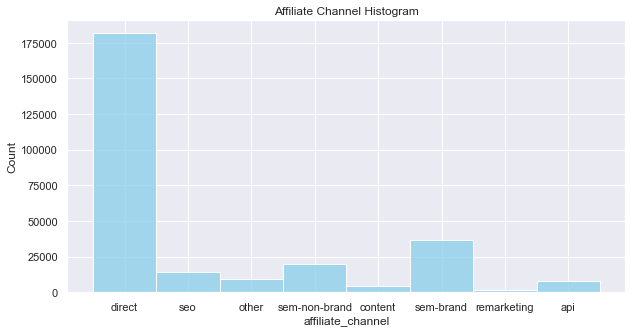

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['affiliate_channel'], color='skyblue');
ax.set(title="Affiliate Channel Histogram")

[Text(0.5, 1.0, 'First Device Type Histogram')]

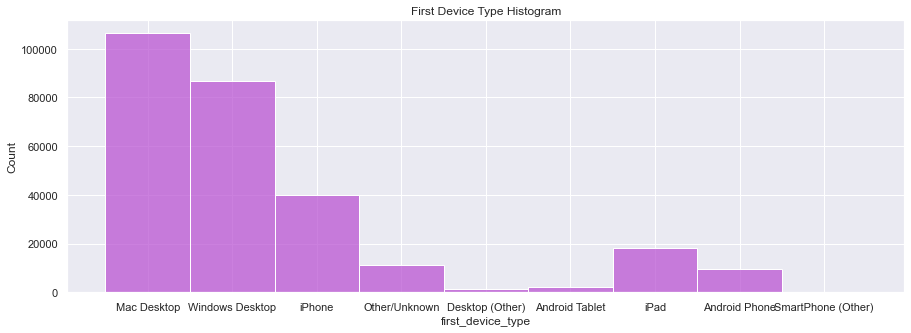

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['first_device_type'], color='mediumorchid');
ax.set(title="First Device Type Histogram")

In [133]:
df['account_create_year'] = df['date_account_created'].dt.year


df_year = df.groupby('account_create_year').count()
df_year['year'] = df_year.index

[Text(0.5, 1.0, 'Year Account Created Histogram')]

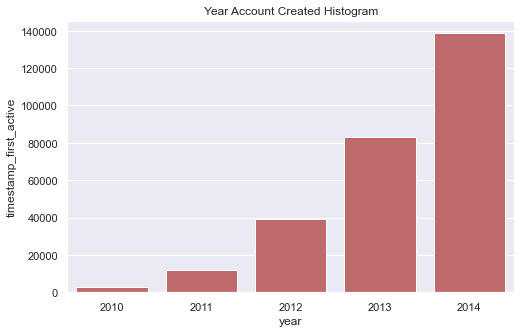

In [136]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='year', y='timestamp_first_active',color='indianred', data=df_year)
ax.set(title="Year Account Created Histogram")

In [168]:
df_age_gender = pd.DataFrame(age_gender.value_counts())
df_age_gender = df_age_gender.sort_values('age_bucket')

In [169]:
df_age_gender.reset_index(inplace=True) 

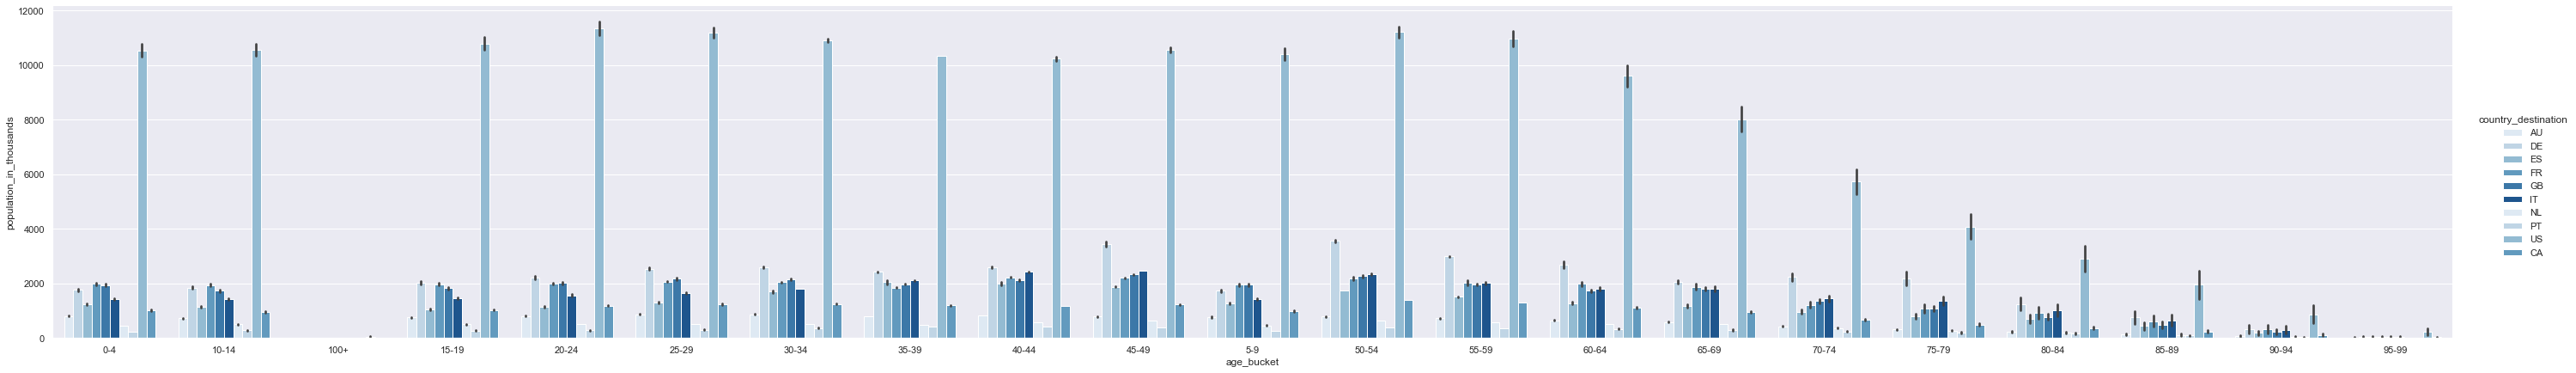

In [170]:
sns.set_palette('Blues')
sns.catplot(x="age_bucket", y="population_in_thousands", kind="bar", hue='country_destination', palette=sns.color_palette("Blues"), data=df_age_gender, height=6, aspect=40/6)